In [129]:
import pandas as pd
import numpy as np
import json
from pandas import DataFrame
from pandas.io.json import json_normalize
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import TweetTokenizer
import nltk
  
def load_file(filename):
    with open(filename) as f:
        d = json.load(f)
        df = DataFrame(d)
        f.close()
    return df

df = load_file('main_categories.json')

In [173]:
import re
import string
from nltk.corpus import stopwords

re_punc = re.compile('[%s]' % re.escape(string.punctuation))



def preprocess_documents(docs):
    clean_docs = [clean_document(doc) for doc in docs]
    return clean_docs



In [628]:
stop_words = set(stopwords.words('english'))


In [107]:
df_.labels.apply(lambda x  : ','.join(x)).value_counts()

Politics                                                11
Religion                                                10
ALcohol & Drugs                                          9
Profanity & Obscenity                                    9
Work & Company                                           7
Misogyny                                                 6
Sex                                                      5
Personal & Family                                        4
                                                         2
ALcohol & Drugs,Profanity & Obscenity                    1
ALcohol & Drugs,Politics,Work & Company                  1
Personal & Family,Profanity & Obscenity,Religion,Sex     1
Politics,Profanity & Obscenity                           1
Politics,Personal & Family,ALcohol & Drugs               1
Name: labels, dtype: int64

In [109]:
!ls *.csv

cgm_max.csv  international-airline-passengers.csv  Tweets.csv


In [133]:
df_tweets = pd.read_csv("Tweets.csv")

In [294]:
# df_tweets

In [150]:
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)
    
# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
    # skip any reviews in the test set
    if filename.startswith('cv9'):
    continue
    # create the full path of the file to open
    path = directory + '/' + filename
    # add doc to vocab
    add_doc_to_vocab(path, vocab)

In [153]:
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
# define vocab
vocab = Counter()
# add all docs to vocab

In [194]:
re.sub('[^A-Za-z0-9]+', '', mystring)

'maybeonedayyoullbetheonequotedonhttptcomJkpgVXmPC'

In [195]:
doc1 = ['maybe', 'one', 'day', "you'll", 'be', 'the', 'one', 'quoted', 'on', 'http://t.co/mJkpgVXmPC']
mystring = ' '.join(doc1)

[re.sub('[^A-Za-z0-9]+', '', token) for token in doc1]

['maybe',
 'one',
 'day',
 'youll',
 'be',
 'the',
 'one',
 'quoted',
 'on',
 'httptcomJkpgVXmPC']

In [244]:
punc_ = set(string.punctuation)

In [248]:
def clean_document(doc) :
    tokens = doc.lower().split()
    
    tokens = [w for w in tokens if '@' not in w]
    print(tokens)
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    #remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if word not in punc_]
    tokens = [re.sub('[^A-Za-z0-9]+', '', word)  for word in tokens]
#     print(tokens)
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [252]:
def cleanTweets(doc):
    tokens = doc.split()
    tokens = tokens[1:]
    doc = ' '.join(tokens)
    tokens = clean_document(doc)
    return tokens

df_tweets["clean_text"] = df_tweets.text.apply(cleanTweets)

['what', 'said.']
['plus', "you've", 'added', 'commercials', 'to', 'the', 'experience...', 'tacky.']
['i', "didn't", 'today...', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip!']
["it's", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '"entertainment"', 'in', 'your', "guests'", 'faces', '&amp;', 'they', 'have', 'little', 'recourse']
['and', "it's", 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']
['seriously', 'would', 'pay', '$30', 'a', 'flight', 'for', 'seats', 'that', "didn't", 'have', 'this', 'playing.', "it's", 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'va']
['yes,', 'nearly', 'every', 'time', 'i', 'fly', 'vx', 'this', '“ear', 'worm”', 'won’t', 'go', 'away', ':)']
['really', 'missed', 'a', 'prime', 'opportunity', 'for', 'men', 'without', 'hats', 'parody,', 'there.', 'https://t.co/mwpg7grezp']
['well,', 'i', "didn't…but", 'now', 'i', 'do!', ':-d']
['it', 'was', 'amazing,', 'and', 'arrived', 'an', 'hour', 'early.', "you're", 'too', 'good', 'to

['on', '4124', 'arriving', 'two', 'hours', 'late', 'flight', 'into', 'clt.', 'now', 'sitting', 'on', 'the', 'tarmac', 'while', 'they', 'move', 'a', 'plane', 'from', 'the', 'gate.', 'unhappy', 'customer.']
['airlines', 'is', 'the', 'absolute', 'worst.', 'they', 'have', 'no', 'idea', 'what', 'they', 'are', 'doing.', '#neveragain', '#unitedairlines']
['thanks;', 'might', 'want', 'to', 'fix', 'this', 'line:', '"our', 'customer', 'care', 'team', 'is', 'currently', 'responding', 'to', 'most', 'inquiries', 'within', '7-10', 'business', 'days."']
['we', 'just', 'flew', 'with', 'united', 'from', 'aus', '(austin', 'bergstrom)', 'to', 'cancun', 'intl.', 'best', 'flight', 'ever!', 'the', "737's", 'are', 'not', 'too', 'big...', 'not', 'too', 'small!']
["it's", 'frustrating,', 'as', 'a', 'frequent', 'flyer,', 'loyal', 'since', 'continental.', 'upgrade', 'equals', 'paying', '3', 'times', 'or', 'more', 'on', 'top', 'of', 'purchase', 'ticket.']
['deep', 'vein', 'thrombosis']
['at', 'its', 'worse.', "ca

['your', 'seats', 'are', 'god', 'awful.']
['good', 'try', 'but', 'got', 'her', 'here', 'safer', 'and', 'sooner']
['wanted', 'to', 'compliment', 'ur', 'phone', 'agent', 'jeanette', 'for', 'reflight', 'booking', 'problems', 'rdu', 'to', 'sea', 'thru', 'sfo', 'after', 'connecting', 'flight', 'thru', 'ewr', 'was', 'cancelled', 'flightled.']
['3', 'hour', '45', 'min', 'delay', 'so', 'far.....', 'would', 'love', 'to', 'round', 'to', '4', 'hours', 'to', 'just', 'go', 'to', 'bed!']
['educate', 'bohol', 'is', 'a', '501(c)(3)', 'w/all', 'volunteer', 'staff.', 'i', 'can', 'help', 'the', 'kids', 'or', 'buy', 'a', 'plane', 'ticket', '...i', "can't", 'do', 'both.', 'can', 'you', 'help?']
['i', 'need', 'to', 'get', 'from', 'albuquerque,', 'nm,', 'usa,', 'to', 'cebu,', 'philippines.', "i'm", 'providing', 'educational', 'help', 'for', '800', 'kids.', 'can', 'you', 'help', 'me?']
["i'm", 'on', 'ua1118', 'and', 'my', 'direct', 'tv', "isn't", 'working.', 'how', 'do', 'i', 'avoid', 'this', 'in', 'future?']

['i', 'fly', 'normally.', 'this', "doesn't", 'happen', 'to', 'me', 'with', 'them.', "i'll", 'let', 'your', 'flyers', 'provide', 'their', 'own', 'feedback.', 'thank', 'you.']
['the', 'upgrade', 'to', 'first', 'class', 'was', 'a', 'nice', 'way', 'to', 'fix', 'your', 'earlier', 'mistake.', 'thank', 'you!']
['how', 'about', 'plowing', 'the', 'snow', 'at', 'a', 'gate', 'before', 'the', 'plane', 'arrives', 'so', 'we', "don't", 'sit', 'for', '45', 'minutes', 'after', 'an', '8', 'hr', 'flight....', 'fail']
['saturday', 'this', 'morning', 'man', 'dies', 'from', 'ebola', 'http://t.co/hxvvis0vww']
['rhonda', 'c.', 'at', 'atlanta', 'airport', 'redeemed', 'you', 'guys.', 'she', 'got', 'us', 'straightened', 'out.']
['ok', 'so', 'what', 'is', 'being', 'done', 'about', 'my', 'experience?', 'my', 'family', 'had', 'a', 'terrible', 'experience', 'for', '$1,200.', "it's", 'kind', 'of', 'like', 'being', 'robbed.explain']
['great', 'job', 'losing', 'one', 'of', 'my', 'six', 'bags', 'on', 'a', 'direct', 'fli

['thank', 'you', 'so', 'much.', 'how', 'will', 'you', 'be', 'able', 'to', 'contact', 'me?']
['maybe', 'on', 'my', 'return', 'trip', '👍']
['your', 'staff', 'at', 'laguardia', 'and', 'lagos,', 'nigeria', 'were', 'unprofessional,', 'uncaring', 'and', 'not', 'helpful.', 'ou']
['i', 'got', 'it', 'at', 'the', 'gate,', 'thanks', 'for', 'checking!']
['u', 'kept', 'passengers', 'waiting', 'all', 'night', '4', 'a', 'plane', 'that', 'was', 'being', 'put', 'out', 'of', 'service.', 'leaving', 'everyone', 'stranded', 'for', 'night.', '#inexcusable']
['i', 'especially', 'like', 'how', 'you', 'upgraded', 'three', 'of', 'your', 'crew', 'members', 'to', 'first', 'class', 'instead', 'of', 'passengers.', '#keepitclassy', '#customerservice']
['hello.', 'i', 'got', 'off', 'a', 'flight', 'a', 'few', 'months', 'ago', 'and', 'constantly', 'think', 'about', 'your', 'peanuts.', 'is', 'there', 'anyway', 'you', 'could', 'send', 'me', 'some?']
['flt', '359', 'lax', 'to', 'ewr.', 'your', 'pilot', 'bragged', 'about',

["that's", 'funny', 'because', 'i', 'emailed', 'once', 'and', 'they', 'found', 'it', "hadn't", 'left', 'lhr.', 'in', 'the', 'mean', 'time', 'stuck', 'with', 'no', 'bag', 'in', 'nyc!!!']
['is', 'the', 'biggest', 'joke', 'of', 'a', 'company,i', 'will', 'never', 'fly', 'with', 'them', 'again!', '3', 'days', 'now', 'waiting', 'for', 'my', 'bag,', 'they', "don't", 'even', 'know', 'where', 'it', 'is!']
['why', "haven't", 'you', 'updated', 'that', 'flight', '4411', 'is', 'delayed?', 'super', 'frustrating']
['how', 'long', 'can', 'i', 'expect', 'the', 'formal', 'response', 'to', 'take?']
['hi,', 'i', 'am', 'flying', 'domestic', 'first', 'from', 'sea', 'to', 'hnl.', 'can', 'i', 'pay', 'to', 'use', 'the', 'lounge', 'before', 'i', 'fly', 'or', 'this', 'is', 'just', 'for', 'international?', 'thanks']
['do', 'you', 'mean', '"fortunately"?', 'i', "don't", 'want', 'my', 'flight', 'to', 'be', 'affected!', '😉']
['volumes,', 'profit', 'up', 'http://t.co/pkfi9bttzf', '#aviation', '#aircargo', 'http://t.c

['hello', 'remaining', 'credits', 'on', 'your', 'account', 'will', 'be', 'refunded', 'back', 'to', 'your', 'credit', 'card,', 'when', 'you', 'choose', 'a', 'lower', 'price', 'flight?']
['when', 'can', 'we', 'expect', 'customer', 'service', 'in', 'dallas', 'to', 'be', 'available']
['it', 'eventually', 'arrived.', 'just', 'seemed', 'really', 'slow.', ':)']
['my', 'bags', 'are', 'on', 'the', 'way', 'to', 'chicago,', 'without', 'me!', 'help!', 'i', 'was', 'confirmed', 'for', '2', 'flights', 'and', 'told', 'there', "isn't", 'room', 'and', "i'm", 'screwed.']
['i', 'just', 'recieved', 'an', 'email', 'from', 'your', 'memphis', 'station', 'hopefully', 'they', 'have', 'my', 'bag.']
['just', 'landed', 'in', 'phl.', 'row', '9', 'window', 'cover', 'on', 'n366sw', 'could', 'use', 'some', 'luv.', 'http://t.co/wqzztiemx0']
['thanks', 'for', 'adding', 'passbook', 'ability!', 'hopefully', 'we', 'can', 'do', 'group', 'passbook', 'tickets', 'in', 'the', 'future', 'somehow.']
['yep.', '99.99999999%', 'cert

['not', 'sure', 'i', 'can', 'trust', 'a', 'statement', 'with', 'that', 'many', 'small', 'numbers', 'above', 'words.', 'http://t.co/o3srl1hfho']
['has', 'posted', 'flight', 'schedule', 'covering', 'the', 'date', 'range', 'of', '23']
['late', 'flightly', "you've", 'always', 'been', 'late', 'flight!', 'please', 'get', 'back', 'to', 'the', 'old', '#swa!!']
['totally', 'sucks', 'that', 'my', 'flights', 'were', 'weathered', 'out', 'of', 'existence,', 'but', 'stacy', 'in', 'tucson', 'helped', 'with', 'an', 'overnight', 'in', 'vegas!']
['are', 'you', 'guys', 'alive?', "i've", 'been', 'on', 'hold', 'for', '25', 'minutes', 'and', 'counting.....']
['gary', 'kelly', 'should', 'be', 'ashamed', 'of', 'himself', 'running', 'a', 'corporation', 'in', 'this', 'way']
['you', 'guys', 'just', 'rip', 'me', 'off', 'if', 'i', 'could', 'cancelled', 'flight', 'every', 'flight', 'i', 'had', 'booked', 'for', 'my', 'employees', 'i', 'would', 'buyer', 'beware']
['not', 'if', 'its', 'travel', 'credit', 'you', 'used'

['had', 'a', 'bad', 'experience', 'with', 'them', 'last', 'week.', 'they', 'broke', 'my', 'bicycle', 'that', 'i', 'had', 'brought', 'with', 'me', 'to', 'do', 'a', 'bike', 'ride', 'in', 'fla.', 'why?']
["i'm", 'so', 'sorry', 'for', 'your', 'frustration.', 'did', 'you', 'get', 'rebooked?', '^sw”', "i've", 'been', 'rebooked', '4', 'times!!', 'still', 'stuck!!', '#smh']
['75', 'minutes', 'and', 'still', 'waiting', 'for', 'skis', 'to', 'be', 'unloaded.', 'you', 'should', 'be', 'ashamed.', "it's", '1:30', 'in', 'the', 'morning.']
['neveind,', "it's", 'been', 'found', 'and', 'on', 'its', 'way.', 'thanks', 'for', 'making', 'the', 'process', 'so', 'painless']
['what', 'are', 'your', 'services?', 'what', 'promotion', 'you', 'have', 'at', 'the', 'moment?', '#modelodenegocio', '#innovation', '#innovacion', '#businessmodel']
['my', 'bag', 'was', 'late', 'flight-checked', 'and', 'put', 'on', 'a', 'different', 'flight', 'from', 'oak-&gt;msy.', 'having', 'troubles', 'tracking', 'it', 'down.', 'any', '

['sounds', 'fun!', 'how', 'does', 'that', 'work?']
['thanks!', 'calling', 'right', 'now!']
['thank', 'you,', 'but', 'that', "isn't", 'really', 'responding', 'to', 'my', 'request,', 'is', 'it?', 'you', 'are', 'sending', 'me', 'into', 'a', 'generic', 'environment', 'on', 'your', 'site.']
['i', 'know', "there's", 'no', 'actual', "'mile", "high'", 'club,', 'but', 'surely', "there's", 'something', 'i', 'can', 'join', ';-)']
['hello!', 'my', 'husband', 'bought', 'us', 'a', 'trip', 'last', 'night', '&amp;', 'just', 'noticed', 'my', 'last', 'name', 'is', 'misspelled!', 'what', 'can', 'i', 'do?', 'thanks!']
['to', 'start', '3xweekly', '#e190', 'flights', 'from', '#washington', 'reagan', 'to', '#nantucket', 'between', '19jun-6sep', '#avgeek']
['i', 'would', 'like', 'to', 'communicate', 'directly', 'with', 'a', '"customer', 'experience"', 'executive.', 'does', 'joanna', 'geraghty', 'have', 'an', 'email', 'address?']
['will', 'you', 'cancelled', 'flight', "tonight's", '7', 'pm', 'out', 'of', 'dfw'

['flight', 'booked!', 'heading', 'out', 'to', 'california', 'with', 'the', 'team', 'for', 'on', 'march', '6-8!', "can't", 'wait!', '#expowest']
['totally', 'would', 'have....', 'but', 'the', 'outside', 'view', 'was', 'even', 'more', 'camera', 'ready', 'haha', '#evenmorespace', '#evenmoreview', 'http://t.co/dxux6dbfd3']
['dont', 'really', 'know', 'what', 'that', 'means', 'but', 'this', 'isnt', 'the', 'best', 'first-time-flying-w-a-16mo', 'old', 'experience.', 'likelihood', 'of', 'addtl', 'delays', '2nt?']
['sent', ':-)', 'curious', 'to', 'see', 'what', 'kind', 'of', 'comp', 'we', 'get.']
['i', "can't", 'wait', 'to', 'hear', 'back', 'from', 'you', 'regarding', 'the', 'internship', 'opportunity!', '😊']
['why', "don't", 'you', 'fly', 'to', '#nashville?', ':(']
['i', '❤️', 'jetblue', 'but', 'i', 'was', 'on', 'flt', '277', 'from', 'fll', 'to', 'sfo.', 'tke', 'off', 'was', 'over', '1', 'hr', 'late', 'flight,', 'div', 'to', 'phx', '&amp;', 'got', 'in', '2', 'hrs', 'late', 'flight.', 'what', 'w

['why', 'are', 'we', 'delayed', ':(', 'flight', '1601']
['continue', 'button', 'generated', 'a', 'trip', 'to', '"plan', 'your', 'trip', 'page"', 'regardless', 'of', 'how', 'far', 'along', 'i', 'was', 'in', 'flight', 'booking', 'problems', 'process', 'hint:', 'the', 'end', 'of', 'it']
['marks', '15th', 'birthday', 'with', '#a320', 'painted', 'in', "'blumanity'", 'paint', 'job', 'http://t.co/9vtfm7knad']
['i', 'would', 'fly', 'to', 'washington', 'dc', 'to', 'see', 'the', 'actual', 'constitution', 'and', 'the', 'declaration', 'of', 'independence,', 'in', 'honor', 'of', 'a', 'us', 'navy', 'friend.']
['what', 'is', 'the', 'name', 'of', 'this', 'tailfin?', 'http://t.co/qxv45mv0ug']
['new', 'ceo', 'robin', 'hayes', 'battles', 'to', 'appease', 'passengers', 'and', 'wall', 'street', '-', 'business', 'in', 'savannah', 'http://t.co/kkay8xaps1']
['we’re', 'looking', 'for', 'our', 'next', '#flyingitforward', 'flier', 'from', 'dc', 'tell', 'us', 'where', "you'd", 'fly', '&amp;', 'why', 'http://t.co/

['does', 'anyone', 'from', 'your', 'airline', 'know', 'how', 'to', 'do', 'their', 'job?']
['has', 'to', 'be', 'the', 'worst', 'airline', 'of', 'all', 'time😡😡😡']
['denied', 'me', 'standby', 'bc', 'of', 'checked', 'bag', 'in', 'cvg', '5163', 'to', 'phl', '6..so', 'i', 'had', 'to', 'take', 'delayed', '3751', '4', 'hrs', 'late', 'flightr...except', 'u', 'lost', 'bag', 'in', 'cvg']
['you', 'reminded', 'me', 'today', 'why', 'i', 'fly']
['looks', 'like', 'our', 'bag', 'has', 'been', 'rescued.', 'thanks!']
['....', "i've", 'been', 'trying', 'to', 'get', 'through', 'to', 'book', 'a', 'reservation', 'and', 'the', 'system', 'will', 'not', 'let', 'me', 'through.', 'day', '3', '#ridiculous']
['you', 'are', 'the', 'worst.']
['making', 'folks', 'run', 'from', 'gate', 'c29', 'to', 'a18', 'to', 'b11', 'with', 'no', 'explanation', 'and', 'zero', 'carts', 'to', 'transfer', 'elderly', 'and', 'handicap.', '#phl']
['have', 'been', 'waiting', 'in', 'an', 'airplane', 'for', 'a', 'total', 'of', '3', 'hours', '

['thank', 'you!!!', 'this', 'whole', 'crew', 'has', 'rocked', 'through', 'bad', 'weather', 'and', 'diversion.', 'pilot', 'keeping', 'us', 'well', 'informed.', '#customerservice']
['what', 'about', 'aa', 'miles', 'for', 'usair', 'flights', 'booked', 'through', 'american?']
['i', 'hope', 'i', 'get', 'the', 'opportunity', 'to', 'join', 'the', 'team', 'with', 'this', 'job', 'opening!']
['how', 'is', 'it', 'that', 'my', 'flt', 'to', 'ewr', 'was', 'cancelled', 'flightled', 'yet', 'flts', 'to', 'nyc', 'from', 'usairways', 'are', 'still', 'flying?']
['flight', 'sf', 'to', 'nyc', 'only', 'made', 'it', 'to', 'philly.', 'ur', 'customer', 'service', 'is', 'telling', 'me', 'no', 'refund', 'for', 'the', 'last', 'leg?', '#offensive']
['can', 'you', 'dm', 'me', 'please?']
['need', 'seat', 'assignments', 'for', 'one', 'leg', 'of', "family's", 'return', 'flight', '-', 'can', 'you', 'please', 'help', 'via', 'twitter', 'pm?']
['thank', 'you!', 'you', 'have', 'always', 'been', 'so', 'good', 'to', 'me.', 'i

['really!??']
['how', 'does', 'an', 'airline', 'misplace', 'an', 'airline', 'attendant?!!', 'been', 'at', 'reagan', 'airport', 'since', '1pm10:15', 'to', 'cincy', 'is', 'delayed', 'trying', 'to', 'find', 'her']
['my', 'flight', 'finally', 'arrived', 'in', 'charlotte.', 'they', 'booked', 'my', 'luggage', 'thru', 'to', 'lga', 'but', 'no', 'room', 'on', 'flight', 'for', 'me.', 'what', 'a', 'mess']
['been', 'on', 'hold', 'for', 'over', 'an', 'hour,', 'still', "don't", 'know', 'where', 'my', 'bags', 'are,', "won't", 'refund', 'me', 'my', 'flight?!?!', 'it', "wasn't", 'weather!!']
['no', 'your', 'not!']
['my', 'wife', 'had', 'flight', 'changes', 'due', 'to', 'weather', 'now', 'she', 'cant', 'checkin', 'to', 'her', 'return', 'flight', 'and', 'it', 'fails', 'is', 'it', 'possible', 'usair', 'cancelled', 'flightled']
['thank', 'you', 'for', 'fixing', 'my', '5', 'hour', 'delay.']
['yup', '1:34', 'minutes', 'was', 'my', 'limit', 'of', 'waiting', 'on', 'hold', 'so', 'thanks', 'for', 'nothing']
['th

['checked', 'in', 'on', 'app', 'since', 'yesterday.', 'confirmed', 'upgrade', '&amp;', 'carry', 'on,', 'got', 'to', 'counter', '&amp;', 'manager', 'upgraded', 'somebody', 'else', 'on', 'my', 'seat!']
['trying', 'desperately', 'to', 'get', 'my', 'boyfriend', 'booked', 'on', 'the', 'same', 'us', 'airways', 'flight', 'as', 'myself', 'for', 'the', 'same', 'price.', 'can', 'you', 'help?']
['yes', 'yes', 'yes,so', 'glad', 'to', 'be', 'headed', 'home!']
["don't", 'worry.', "i'll", 'be', 'sending', 'a', 'letter', 'with', 'what', 'i', 'expect', 'from', 'you', 'for', 'compensation.', 'i', 'fly', 'twice', 'a', 'week', 'w/you', 'guys...for', 'now']
['thanks!!']
['thanks', 'keep', 'me', 'updated', 'just', 'hope', 'i', 'make', 'either', 'of', 'my', 'connections', 'to', 'killeen', 'tx']
['i', 'have', 'been', 'on', 'hold', 'w/customer', 'service', 'line', 'for', '68', 'minutes.', 'this', 'after', 'i', 'was', 'on', 'phone', 'with', 'an', 'agent', 'for', '35', 'min', 'b/f', 'call', 'droped']
['i', 'trie

['should', 'prob', 'give', 'me', 'a', 'refund', 'since', 'they', 'made', 'me', 'miss', 'my', 'flight', 'waiting', 'to', 'talk', 'to', 'someone', 'for', '3', 'hours...', 'http://t.co/4sfpcbyy9m']
["i've", 'tried...its', 'anyway']
['oh', 'i', 'did.', 'all', 'i', 'received', 'back', 'was', 'an', 'email', 'saying', '"', 'delays', 'happen"..', 'uh', 'huh..']
['how', 'do', 'i', 'place', 'it', 'on', 'hold', 'and', 'complete', 'payment?', 'i', "don't", 'see', 'any', 'way', 'to', 'do', 'that', 'from', 'my', 'reservations', 'page.']
['bad', 'weather', 'happens.', 'but', 'not', 'being', 'able', 'to', 'get', 'through', 'to', 'a', 'reservations', 'rep', 'for', 'over', '6', 'hours', 'is', 'just', 'crazy.', '#frustrated']
['flight', 'get', 'me', 'out', 'of', 'chicago.']
['why', 'are', 'customer', 'svc', 'reps', 'unable', 'to', 'handle', 'calls.', 'is', 'there', 'a', '24hrs', 'cancelled', 'flightlation', 'policy?', 'booked', 'yesterday', 'need', 'to', 'cancelled', 'flight']
['bad', 'weather', 'is', 'u

['err', '2', 'hour', 'wait', 'time', 'for', 'the', 'exec.', 'plat.', 'line?']
['can', 'you', 'please', 'connect', 'these', 'two', 'reservations', 'together', 'and', 'also', 'add', 'a', 'child', 'in', 'a', 'lap.', 'kevolt', 'and', 'sozldj', 'march', '1.', 'thanks']
['...', 'do', 'i', 'have', 'to', 'even', 'say', 'anything?', 'over', '6', 'hours', 'on', 'hold...', 'no', 'one', 'has', 'ever', 'sucked', 'as', 'much', 'as', 'you.', 'http://t.co/ncrmqibiwo']
['my', 'flight', '#2962', 'out', 'of', 'cll', '0600', "won't", 'let', 'me', 'check', 'in.', 'please', 'help.', '#importantflight']
['your', 'agent', 'sent', 'our', 'family', 'on', '3', 'diff', 'planes', 'to', 'dfw', 'that', 'were', 'as', 'late', 'flight', 'due', 'to', 'delay', 'as', 'the', 'cancelled', 'flighted', 'plane', 'that', 'started', 'this', '#fail']
['finally', 'got', 'a', 'call', 'from', 'aa,', 'but', 'it', 'was', 'an', 'automated', 'voice', 'that', 'hung', 'up', 'on', 'me!', 'i', 'called', 'back', '&amp;', 'it', 'says', "it'll

['the', 'personal', 'touch', "you're", 'known', 'for,', 'aa.', 'other', 'cool', 'perks:', 'blaming', 'understaffing', 'on', 'weather.', 'and', '3', 'hr', 'hold', 'times.']
['been', 'waiting', 'in', 'line', 'for', 'over', 'an', 'hour', 'in', 'san', 'antonio,', 'barely', 'moved', '&amp;', 'only', 'two', 'agents.', '30', 'in', 'front', 'of', 'me', '&amp;', 'at', 'least', '40', 'behind.']
['my', 'return', 'flight', 'is', 'scheduled', 'on', 'wednesday;', 'aa138', 'i', 'believe.', 'thanks', 'for', 'the', 'help!']
['you', 'neglected', 'to', 'mention', 'the', '$200', 'fee', 'per', 'ticket.', 'i', 'had', 'a', 'medical', 'reason', 'and', 'still', 'have', 'had', 'to', 'jump', 'thru', 'hoops.']
['....i', 'am', 'on', 'attempt', '#6', 'and', 'hour', '#10', 'of', 'calling', 'and', 'being', 'put', 'on', 'hold.', 'not', 'feeling', 'confident', 'that', 'i', 'will', 'ever', 'get', 'through...']
['bought', 'a', 'ticket', 'on', 'after', 'two', 'days,', 'your', '"team"', "couldn't", 'share', 'the', 'data', 

In [253]:
#   clean_document
# df_tweets["clean_text"] = df_tweets.text.apply(cleanTweets)

In [255]:
sent = list(df_tweets.airline_sentiment.value_counts().index)
val = [0,1,2]
sen_mapping = dict(zip(sent,val))

df_tweets["sent_map"] = df_tweets.airline_sentiment.map(sen_mapping)
df_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text,sent_map
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),[said],1
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),"[plus, youve, added, commercials, experience, ...",2
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),"[didnt, today, must, mean, need, take, another...",1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),"[really, aggressive, blast, obnoxious, enterta...",0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),"[really, big, bad, thing]",0


In [260]:
df_tweets.columns
df_tweets[["clean_text", "sent_map"]].head()

,clean_text,sent_map
0,[said],1
1,"[plus, youve, added, commercials, experience, ...",2
2,"[didnt, today, must, mean, need, take, another...",1
3,"[really, aggressive, blast, obnoxious, enterta...",0
4,"[really, big, bad, thing]",0


### create vocobulary

In [ ]:
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)


# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)

In [273]:
from collections import Counter
from nltk.corpus import stopwords
# define vocab
vocab = Counter()

In [278]:
vocab

Counter({'said': 178,
         'plus': 58,
         'youve': 56,
         'added': 20,
         'commercials': 6,
         'experience': 202,
         'tacky': 1,
         'didnt': 205,
         'today': 406,
         'must': 35,
         'mean': 55,
         'need': 552,
         'take': 266,
         'another': 272,
         'trip': 207,
         'really': 297,
         'aggressive': 3,
         'blast': 2,
         'obnoxious': 2,
         'entertainment': 25,
         'guests': 4,
         'faces': 3,
         'amp': 636,
         'little': 68,
         'recourse': 5,
         'big': 71,
         'bad': 184,
         'thing': 68,
         'seriously': 78,
         'would': 548,
         'pay': 135,
         'flight': 3869,
         'seats': 207,
         'playing': 8,
         'flying': 311,
         'va': 10,
         'yes': 234,
         'nearly': 14,
         'every': 116,
         'time': 769,
         'fly': 374,
         'vx': 7,
         'go': 306,
         'away': 72,
     

In [279]:
print(vocab.most_common(50))

[('flight', 3869), ('get', 1334), ('thanks', 1061), ('cancelled', 1056), ('service', 953), ('help', 852), ('time', 769), ('customer', 746), ('im', 740), ('us', 678), ('hours', 669), ('flights', 645), ('hold', 637), ('amp', 636), ('plane', 617), ('thank', 593), ('cant', 573), ('still', 567), ('one', 558), ('need', 552), ('please', 551), ('would', 548), ('delayed', 529), ('back', 517), ('gate', 513), ('flightled', 502), ('call', 500), ('dont', 486), ('bag', 483), ('hour', 464), ('got', 463), ('like', 426), ('late', 425), ('phone', 420), ('today', 406), ('airline', 396), ('fly', 374), ('guys', 374), ('waiting', 365), ('know', 355), ('trying', 348), ('airport', 342), ('way', 338), ('great', 331), ('going', 325), ('ive', 324), ('day', 322), ('wait', 317), ('never', 316), ('make', 312)]


In [277]:
for arr in df_tweets[["clean_text"]].values:
    print(arr[0])
    vocab.update(arr[0])

['said']
['plus', 'youve', 'added', 'commercials', 'experience', 'tacky']
['didnt', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']
['really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'guests', 'faces', 'amp', 'little', 'recourse']
['really', 'big', 'bad', 'thing']
['seriously', 'would', 'pay', 'flight', 'seats', 'didnt', 'playing', 'really', 'bad', 'thing', 'flying', 'va']
['yes', 'nearly', 'every', 'time', 'fly', 'vx', 'go', 'away']
['really', 'missed', 'prime', 'opportunity', 'men', 'without', 'hats', 'parody']
['well']
['amazing', 'arrived', 'hour', 'early', 'youre', 'good']
['know', 'suicide', 'second', 'leading', 'cause', 'death', 'among', 'teens']
['pretty', 'graphics', 'much', 'better', 'minimal', 'iconography']
['great', 'deal', 'already', 'thinking', 'trip', 'amp', 'havent', 'even', 'gone', 'trip', 'yet']
['im', 'flying', 'fabulous', 'seductive', 'skies', 'take', 'stress', 'away', 'travel', 'httptcoahlxhhkiyn']
['thanks']
['sfopdx', 'schedule', 'still'

['patient', 'refused', 'switch', 'flight', 'bc', 'checked', 'bag', 'cancelled', 'flightled', 'one']
['sent', 'dm', 'last', 'week', 'suit', 'regarding', 'error', 'response', 'given', 'please', 'answer', 'dm', 'tell', 'send', 'suit']
['try', 'standby', 'denver', 'tonight', 'cancelled', 'flight', 'father', 'son', 'trip', 'till', 'next', 'year', 'thx', 'trying']
['wrote', 'got', 'nothingand', 'us', 'simple', 'thingwill', 'ypu', 'provide', 'compensation', 'delay']
['many', 'currently', 'operate', 'aircraft', 'operate']
['dont', 'want', 'customers', 'frustrated', 'thank', 'patience', 'lovely', 'sentiment', 'one']
['different', 'departure', 'arrival', 'updates', 'please']
['nope', 'really', 'window', 'one', 'one', 'none', 'sad']
['vegan', 'meals', 'creative', 'noodles', 'peas', 'zukes', 'nonvegan', 'yogurt', 'acceptable', 'vegan', 'better']
['well', 'thanks', 'charging', 'switching', 'two', 'cancelled', 'flightled', 'flights', 'anyway', 'pretty', 'nice', 'stillmakingmepoorthough']
['well', 'j

['dont', 'tell', 'update', 'boards']
['say', 'comes', 'brandloveaffair', 'ur', 'soulandinspiration', 'httpstcoigkogywksr', 'umosaicmecrazy']
['issue', 'jfk', 'pilot', 'explained', 'jfk', 'reopens', 'get', 'scheduled', 'back', 'cant', 'divert', 'lga', 'closer', 'acy']
['want', 'talk', 'wall']
['great', 'service', 'pbi', 'hpn', 'thanks']
['poor', 'flight', 'management', 'reason', 'scheduled', 'pm', 'flight', 'takr']
['hi', 'way', 'check', 'track', 'flight', 'arrive', 'amp', 'flight', 'depart']
['done', 'thank']
['note', 'time', 'taken', 'flight', 'still', 'listed', 'time', 'im', 'onboard', 'httptcozvfmxnuelj']
[]
['flight', 'listed', 'time', 'im', 'plane', 'yet']
['ok', 'start', 'looking', 'flights']
['ok', 'got', 'far', 'atlantic', 'city', 'due', 'jfk', 'closed', 'get', 'us', 'hpn', 'lga', 'please']
['flight', 'nassau', 'jfk', 'showing', 'cancelled', 'flightled', 'yet', 'assuming', 'info']
['need', 'eta', 'please']
['confirm']
['fly', 'delayed', 'ice', 'jfk', 'switch', 'late', 'flightr'

['still', 'rep', 'talk', 'days', 'late', 'flightr', 'asking', 'checkin', 'flight', 'tmrw', 'refund', 'requested', 'deal']
['flight', 'waiting', 'minutes', 'rsw', 'waiting', 'weight', 'balance', 'clearance', 'come', 'let', 'us', 'leave']
['marked', 'completed', 'im', 'scared', 'im', 'going', 'lose', 'reservation', 'money', 'going', 'refunded']
['completed', 'thats', 'case', 'still', 'say', 'progress', 'paypals', 'website', 'reserved']
['contacted', 'bank', 'took', 'money', 'today', 'also', 'contacted', 'said', 'reservation']
['appreciate', 'calls', 'flights', 'delayed', 'recorded', 'msg', 'tedious', 'amp', 'goes', 'amp', 'vote', 'texts', 'practical']
['horrible', 'communication', 'delayed', 'flight', 'lga', 'got', 'emails', 'seconds', 'different', 'delay', 'times', 'horrible']
['thank', 'finally', 'got', 'bag', 'customer', 'services', 'reps', 'wonderful']
['flight', 'phl', 'sat', 'snow', 'expected', 'able', 'switch', 'earlier', 'flight', 'without', 'penalty']
['got', 'bags', 'today', 't

['wheels', 'exact', 'im', 'sending', 'dm']
['translation', 'dont', 'reinvest', 'mammoth', 'profits', 'customer', 'service', 'experience', 'cause', 'dont', 'care']
['omg', 'answer', 'phone', 'hold', 'hours', 'cancelled', 'flighted', 'flights', 'suck']
['quit', 'nonsense', 'amp', 'lies', 'colossal', 'infringement', 'longer', 'get', 'away']
['looks', 'like', 'get', 'going', 'finally']
['couldnt', 'care', 'less', 'thats', 'customer', 'service', 'run', 'bots']
['pls', 'tell', 'get', 'person', 'phone', 'asap']
['cancelled', 'flighted', 'flight', 'tomorrow', 'morning', 'number', 'nothing', 'please', 'want', 'go', 'home']
['wont', 'allow', 'calls', 'husband', 'ticket', 'looks', 'like', 'seats', 'taken', 'cant', 'even', 'call']
['yes', 'get', 'home', 'tomorrow', 'please']
['unfriendly', 'unhelpful', 'agents', 'unannounced', 'gate', 'changes', 'delayed', 'flight', 'found', 'word', 'mouth']
['flight', 'still', 'sitting', 'dfw', 'waiting', 'baggage', 'loaded']
['tried', 'several', 'times', 'select

In [280]:
# keep tokens with a min occurrence
min_occurrence = 2
tokens = [k for k,c in vocab.items() if c >= min_occurrence]
print(len(tokens))

5563


In [281]:
# save list to file
def save_list(lines, filename):
    # convert lines to a single blob of text
    data = '\n'.join(lines)
    # open file
    file = open(filename, 'w')
    # write text
    file.write(data)
    # close file
    file.close()
    
# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

In [284]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [289]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [291]:
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())
# vocab

{'projects',
 'overheating',
 'print',
 'shuttle',
 'canned',
 'flipped',
 'condomrito',
 'mention',
 'got',
 'period',
 'able',
 'thru',
 'top',
 'linked',
 'enforcing',
 'shipped',
 'legit',
 'works',
 'relationship',
 'disinfectant',
 'culture',
 'traffic',
 'ha',
 'fro',
 'sick',
 'record',
 'emergency',
 'communications',
 'tamara',
 'isp',
 'happening',
 'offered',
 'arrive',
 'track',
 'cae',
 'necessary',
 'newburgh',
 'cases',
 'so',
 'never',
 'noservice',
 'exists',
 'away',
 'browsers',
 'educational',
 'google',
 'pack',
 'held',
 'blew',
 'intent',
 'hep',
 'inbox',
 'reference',
 'noone',
 'locating',
 'ideas',
 'wife',
 'gfc',
 'ms',
 'owe',
 'phil',
 'southwestairlines',
 'ahold',
 'unfortunate',
 'policy',
 'accounts',
 'least',
 'facebook',
 'neglect',
 'resched',
 'proceed',
 'help',
 'gloves',
 'orf',
 'desks',
 'pafe',
 'length',
 'accommodated',
 'el',
 'capt',
 'update',
 'located',
 'snags',
 'bye',
 'dmed',
 'enjoyed',
 'dunno',
 'well',
 'constant',
 'slide',

In [296]:
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

In [362]:
lines = []
target = []
for tweet in df_tweets[["clean_text","sent_map" ]].values:
#     print(tweet[0])
    tokens = tweet[0]
    target.append(tweet[1])
    tokens = [w for w in tokens if w in vocab]
    lines.append(' '.join(tokens))

In [365]:
df_tweets["clean_text_by_voc"] = lines

In [370]:
df_tweets[["clean_text_by_voc","sent_map"]].head()

,clean_text_by_voc,sent_map
0,said,1
1,plus youve added commercials experience,2
2,didnt today must mean need take another trip,1
3,really aggressive blast obnoxious entertainmen...,0
4,really big bad thing,0


In [416]:
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)
train, test = train_test_split(df_tweets[["clean_text_by_voc","sent_map" ]], test_size=0.2)

xtrain_docs , y_train_docs= train["clean_text_by_voc"] , train["sent_map"]
xtest_docs , y_test_docs= test["clean_text_by_voc"] , test["sent_map"]

In [417]:
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [452]:
# encode data
tokenizer = create_tokenizer(xtrain_docs)
Xtrain = tokenizer.texts_to_matrix(xtrain_docs, mode='freq' )
Xtest = tokenizer.texts_to_matrix(xtest_docs, mode='freq')

In [453]:
print((Xtrain.shape ,y_train_docs.shape))
print((xtest_docs.shape, y_test_docs.shape))

((11712, 5497), (11712,))
((2928,), (2928,))


In [420]:
n_words = Xtest.shape[1]
n_words

5497

In [454]:
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    # compile network
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [455]:
model = define_model(n_words)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                274900    
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 153       
Total params: 275,053
Trainable params: 275,053
Non-trainable params: 0
_________________________________________________________________


In [456]:
# fit network
model.fit(Xtrain, to_categorical(y_train_docs), epochs=10, verbose=2)

Epoch 1/10
 - 1s - loss: 0.8890 - acc: 0.6323
Epoch 2/10
 - 1s - loss: 0.6054 - acc: 0.7581
Epoch 3/10
 - 1s - loss: 0.4651 - acc: 0.8309
Epoch 4/10
 - 1s - loss: 0.4011 - acc: 0.8554
Epoch 5/10
 - 1s - loss: 0.3585 - acc: 0.8732
Epoch 6/10
 - 1s - loss: 0.3261 - acc: 0.8850
Epoch 7/10
 - 1s - loss: 0.3005 - acc: 0.8944
Epoch 8/10
 - 1s - loss: 0.2785 - acc: 0.9026
Epoch 9/10
 - 1s - loss: 0.2597 - acc: 0.9092
Epoch 10/10
 - 1s - loss: 0.2430 - acc: 0.9172


In [457]:
# evaluate
loss, acc = model.evaluate(Xtest, to_categorical(y_test_docs), verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 77.219945


In [458]:
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode training data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest

In [481]:
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 10
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        # define network
        model = define_model(n_words)
        # fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=0)
        # evaluate
        _, acc = model.evaluate(Xtest, to_categorical(y_test_docs), verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

In [482]:
# tokenizer.texts_to_matrix(test_docs, mode=mode)

In [483]:
# prepare_data(xtrain_docs, xtest_docs, mode)

In [484]:
# ytest

In [487]:
# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
    # prepare data for mode
    Xtrain, Xtest = prepare_data(xtrain_docs, xtest_docs, mode)
    # evaluate model on data for mode
    results[mode] = evaluate_mode(Xtrain, to_categorical(y_train_docs), Xtest, to_categorical(y_test_docs))
    # summarize results
    # 10.6. Comparing Word Scoring Methods 107
    print(results.describe())
# plot results
results.boxplot()
pyplot.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                274900    
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 153       
Total params: 275,053
Trainable params: 275,053
Non-trainable params: 0
_________________________________________________________________
1 accuracy: 0.7530737704918032
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                274900    
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 153       
Total params: 275,053
Trainable params: 275,053
Non-trainable params: 0
_________________________________________________________________
2 accuracy: 0.7503415300546448
__

3 accuracy: 0.742827868852459
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 50)                274900    
_________________________________________________________________
dense_34 (Dense)             (None, 3)                 153       
Total params: 275,053
Trainable params: 275,053
Non-trainable params: 0
_________________________________________________________________
4 accuracy: 0.7465846994535519
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 50)                274900    
_________________________________________________________________
dense_36 (Dense)             (None, 3)                 153       
Total params: 275,053
Trainable params: 275,053
Non-trainable params: 0
_________________________________________________________________
5 a

6 accuracy: 0.7472677595628415
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 50)                274900    
_________________________________________________________________
dense_60 (Dense)             (None, 3)                 153       
Total params: 275,053
Trainable params: 275,053
Non-trainable params: 0
_________________________________________________________________
7 accuracy: 0.7482923497267759
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 50)                274900    
_________________________________________________________________
dense_62 (Dense)             (None, 3)                 153       
Total params: 275,053
Trainable params: 275,053
Non-trainable params: 0
_________________________________________________________________
8 

9 accuracy: 0.7711748633879781
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 50)                274900    
_________________________________________________________________
dense_86 (Dense)             (None, 3)                 153       
Total params: 275,053
Trainable params: 275,053
Non-trainable params: 0
_________________________________________________________________
10 accuracy: 0.7715163934426229
          binary      count      tfidf       freq
count  10.000000  10.000000  10.000000  10.000000
mean    0.748156   0.749795   0.746516   0.772473
std     0.002536   0.003732   0.005029   0.003903
min     0.744877   0.742828   0.737705   0.767760
25%     0.746414   0.747268   0.745304   0.770236
50%     0.747439   0.750683   0.747609   0.771175
75%     0.749744   0.752647   0.749573   0.773822
max     0.753074   0.754781   0.753074   0.781079


NameError: name 'pyplot' is not defined

In [489]:
import matplotlib.pyplot as plt
%matplotlib inline

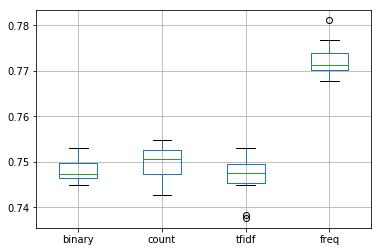

In [490]:
results.boxplot()
plt.show()

In [507]:
# y_test_docs 
# 0,1,2

In [491]:
###  Predict New Sentiment

In [528]:
# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, model):
    # clean
#     tokens = clean_doc(review)
    
    tokens = clean_document(text)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    # convert to line
    line = ' '.join(tokens)
    # encode
    encoded = tokenizer.texts_to_matrix([line], mode='freq')
    # predict sentiment
    yhat = model.predict(encoded, verbose=0)
    max_index = np.argmax(yhat[0])
    print(yhat[0])
    print(yhat[0][max_index])
    # retrieve predicted percentage and label
    percent_pos = yhat[0][max_index]
    if max_index == 0 : 
        return (percent_pos), '0'
    
    if max_index == 1 : 
        return (percent_pos), '1'
    if max_index == 2 : 
        return (percent_pos), '2'
    return "NA"

In [529]:
# test positive text
text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
percent, sentiment 

['best', 'movie', 'ever!', 'it', 'was', 'great,', 'i', 'recommend', 'it.']
[3.8222536e-03 6.2290934e-04 6.7944717e-01]
0.6794472


(0.6794472, '2')

In [530]:
# test positive text
text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))
# test negative text
text = 'This is a bad movie.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

['best', 'movie', 'ever!', 'it', 'was', 'great,', 'i', 'recommend', 'it.']
[3.8222536e-03 6.2290934e-04 6.7944717e-01]
0.6794472
Review: [Best movie ever! It was great, I recommend it.]
Sentiment: 2 (67.945%)
['this', 'is', 'a', 'bad', 'movie.']
[3.3048332e-01 2.8178841e-04 1.8756195e-03]
0.33048332
Review: [This is a bad movie.]
Sentiment: 0 (33.048%)


In [569]:
# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='sigmoid'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [535]:
len(vocab)

5563

In [ ]:
max_length = max([len(s.split()) for s in train_docs])

In [ ]:
# define model
model = define_model(vocab_size, max_length)

In [552]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [ ]:
Xtrain = tokenizer.texts_to_matrix(xtrain_docs, mode='freq' )
Xtest = tokenizer.texts_to_matrix(xtest_docs, mode='freq')

In [548]:
max_length = max([len(doc) for doc in encoded_docs])
vocab_size = len(vocab)

In [550]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
encoded_docs = tokenizer.texts_to_sequences(xtrain_docs)

In [570]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)
    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

In [586]:
Xtrain  = encode_docs(tokenizer, max_length, xtrain_docs)
Xtest  = encode_docs(tokenizer, max_length, xtest_docs)

In [572]:
model = define_model(vocab_size, max_length)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 100)           556300    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 13, 32)            25632     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 6, 32)             0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 10)                1930      
_________________________________________________________________
dense_94 (Dense)             (None, 3)                 33        
Total params: 583,895
Trainable params: 583,895
Non-trainable params: 0
_________________________________________________________________


In [573]:
# fit network
model.fit(Xtrain, to_categorical(y_train_docs), epochs=10, verbose=2)
# save the model
model.save('model.h5')

Epoch 1/10
 - 4s - loss: 0.7465 - acc: 0.6709
Epoch 2/10
 - 2s - loss: 0.4803 - acc: 0.8127
Epoch 3/10
 - 2s - loss: 0.3003 - acc: 0.8920
Epoch 4/10
 - 2s - loss: 0.1799 - acc: 0.9389
Epoch 5/10
 - 2s - loss: 0.1086 - acc: 0.9658
Epoch 6/10
 - 2s - loss: 0.0765 - acc: 0.9761
Epoch 7/10
 - 2s - loss: 0.0587 - acc: 0.9822
Epoch 8/10
 - 2s - loss: 0.0473 - acc: 0.9850
Epoch 9/10
 - 2s - loss: 0.0392 - acc: 0.9875
Epoch 10/10
 - 2s - loss: 0.0350 - acc: 0.9875


In [574]:
model.save('model_98.h5')

In [592]:
from pickle import dump
# save a dataset to file
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)
    # load and clean all reviews
#     train_docs, ytrain = load_clean_dataset(True)
#     test_docs, ytest = load_clean_dataset(False)
# save training datasets
save_dataset([Xtrain, to_categorical(y_train_docs)], 'train.pkl')
save_dataset([Xtest, to_categorical(y_test_docs)], 'test.pkl')
    


Saved: train.pkl
Saved: test.pkl


In [598]:
from pickle import load
# load a clean dataset
def load_dataset(filename):
    return load(open(filename, 'rb'))
trainLines, trainLabels = load_dataset('train.pkl')

In [599]:
# # This tutorial is divided into the following parts:
# 1. Word Embeddings + CNN = Text Classication
# 2. Use a Single Layer CNN Architecture
# 3. Dial in CNN Hyperparameters
# 4. Consider Character-Level CNNs
# 5. Consider Deeper CNNs for Classication

# define the model
def define_model(length, vocab_size):
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size, 100)(inputs1)
    conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    
    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size, 100)(inputs2)
    conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)
    
    # channel 3
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size, 100)(inputs3)
    conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)
    
    # merge
    merged = concatenate([flat1, flat2, flat3])
    
    # interpretation
    dense1 = Dense(10, activation='relu')(merged)
    outputs = Dense(3, activation='sigmoid')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    model.summary()
    plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

In [600]:
vocab_size = len(tokenizer.word_index) + 1

In [607]:
# Xtrain

array([[ 607, 2112,  390, ...,    0,    0,    0],
       [ 110, 2395,    0, ...,    0,    0,    0],
       [ 357,  170,  325, ...,    0,    0,    0],
       ...,
       [ 151,  153, 2125, ...,    0,    0,    0],
       [  30,   32,  118, ...,    0,    0,    0],
       [ 618,   48,   96, ...,    0,    0,    0]], dtype=int32)

In [601]:
vocab_size

5497

In [602]:
# encode a list of lines
def encode_text(tokenizer, lines, length):
    # integer encode
    encoded = tokenizer.texts_to_sequences(lines)
    # pad encoded sequences
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded

In [606]:
trainLines
Xtrain  = encode_docs(tokenizer, max_length, xtrain_docs)
Xtest  = encode_docs(tokenizer, max_length, xtest_docs)

array([[ 607, 2112,  390, ...,    0,    0,    0],
       [ 110, 2395,    0, ...,    0,    0,    0],
       [ 357,  170,  325, ...,    0,    0,    0],
       ...,
       [ 151,  153, 2125, ...,    0,    0,    0],
       [  30,   32,  118, ...,    0,    0,    0],
       [ 618,   48,   96, ...,    0,    0,    0]], dtype=int32)

In [618]:
length = max_length
from numpy import array
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.merge import concatenate
from keras.models import Model

In [619]:
trainX = encode_text(tokenizer, xtrain_docs, max_length)
# define model
model = define_model(length, vocab_size)
# fit model
model.fit([trainX,trainX,trainX], array(trainLabels), epochs=7, batch_size=16)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 20)           0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           (None, 20)           0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           (None, 20)           0                                            
__________________________________________________________________________________________________
embedding_15 (Embedding)        (None, 20, 100)      549700      input_10[0][0]                   
__________________________________________________________________________________________________
embedding_

In [621]:
# load the model
from keras.models import load_model
# save the model
model.save('model_multi.h5')


model = load_model('model_multi.h5')


In [626]:
to_categorical(y_train_docs)

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [625]:
testX  = encode_docs(tokenizer, max_length, xtest_docs)

In [627]:
# evaluate model on training dataset
_, acc = model.evaluate([trainX,trainX,trainX],to_categorical(y_train_docs), verbose=2)
print('Train Accuracy: %.2f' % (acc*100))
# evaluate model on test dataset dataset
_, acc = model.evaluate([testX,testX,testX],to_categorical(y_test_docs), verbose=2)
print('Test Accuracy: %.2f' % (acc*100))

Train Accuracy: 98.53
Test Accuracy: 73.87


In [437]:
############# ANother Dataset!!!!

In [95]:
df1 = df.annotation.apply(lambda x: pd.Series(json.loads( json.dumps(x))))
df2 = df.metadata.apply(lambda x: pd.Series(json.loads( json.dumps(x))))
df_ = pd.concat([df1,df2,df[["content","extras"]] ],axis =1)
df_.head()


,labels,note,first_done_at,last_updated_at,sec_taken,last_updated_by,status,evaluation,content,extras
0,"[Politics, Personal & Family, ALcohol & Drugs]",,1533237393000,1533237393000,5,yevFOBbsaFOP9hXvWRPJle2Kmlg2,done,NONE,Public holiday something something to do with ...,None
1,[Profanity & Obscenity],,1532616021000,1532616021000,1,4dxb5ANrydckomkmIoRY7lcnzF72,done,NONE,Less secure people would see something brightl...,None
2,[ALcohol & Drugs],,1532618576000,1532618576000,4,yevFOBbsaFOP9hXvWRPJle2Kmlg2,done,NONE,you guys look too young to drink.,None
3,[Religion],,1532616012000,1532616012000,1,4dxb5ANrydckomkmIoRY7lcnzF72,done,NONE,Pretty clear he recognizes the difference.,None
4,[ALcohol & Drugs],,1532616521000,1532616521000,13,yevFOBbsaFOP9hXvWRPJle2Kmlg2,done,NONE,I took it from the pharmacy. I don't know if w...,None


In [2]:
#### Classification of chat interactions